# 각각의 좌표간 떨어진 거리 구하기

격자의 모서리들 중 2개를 선택해 각각의 떨어진 거리를 구하는 솔류션

In [27]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

필요한 모듈들 임포트

In [2]:
cornersImage = cv2.imread('corners.png')

이미지 로드

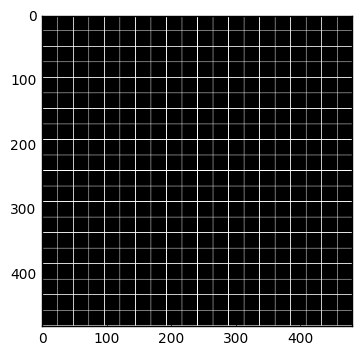

In [3]:
plt.imshow(cornersImage)

로드한 이미지 테스트 출력

In [4]:
cornersGrayImage = cv2.cvtColor(cornersImage, cv2.COLOR_BGR2GRAY)

영상 처리를 위해 흑백이미지로 변환

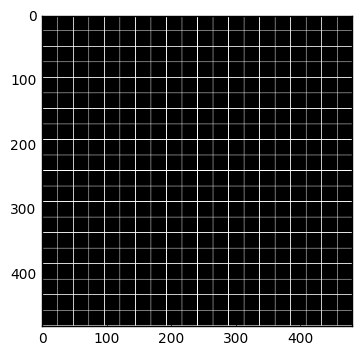

In [5]:
plt.imshow(cornersGrayImage, cmap = 'gray')

이미지 테스트 출력

In [6]:
detectCornerExpectScale = 1000
precisionOfDetection = 0.01
minimalEachCornerDistance = 10
cornersPositionData = cv2.goodFeaturesToTrack(cornersGrayImage, detectCornerExpectScale, precisionOfDetection, minimalEachCornerDistance)
print cornersPositionData

[[[ 456.  456.]]

 [[ 432.  456.]]

 [[ 408.  456.]]

 [[ 384.  456.]]

 [[ 360.  456.]]

 [[ 336.  456.]]

 [[ 312.  456.]]

 [[ 288.  456.]]

 [[ 264.  456.]]

 [[ 240.  456.]]

 [[ 216.  456.]]

 [[ 192.  456.]]

 [[ 168.  456.]]

 [[ 144.  456.]]

 [[ 120.  456.]]

 [[  96.  456.]]

 [[  72.  456.]]

 [[  48.  456.]]

 [[  24.  456.]]

 [[ 456.  432.]]

 [[ 432.  432.]]

 [[ 408.  432.]]

 [[ 384.  432.]]

 [[ 360.  432.]]

 [[ 336.  432.]]

 [[ 312.  432.]]

 [[ 288.  432.]]

 [[ 264.  432.]]

 [[ 240.  432.]]

 [[ 216.  432.]]

 [[ 192.  432.]]

 [[ 168.  432.]]

 [[ 144.  432.]]

 [[ 120.  432.]]

 [[  96.  432.]]

 [[  72.  432.]]

 [[  48.  432.]]

 [[  24.  432.]]

 [[ 456.  408.]]

 [[ 432.  408.]]

 [[ 408.  408.]]

 [[ 384.  408.]]

 [[ 360.  408.]]

 [[ 336.  408.]]

 [[ 312.  408.]]

 [[ 288.  408.]]

 [[ 264.  408.]]

 [[ 240.  408.]]

 [[ 216.  408.]]

 [[ 192.  408.]]

 [[ 168.  408.]]

 [[ 144.  408.]]

 [[ 120.  408.]]

 [[  96.  408.]]

 [[  72.  408.]]

 [[  48.  

최대 1000개의 점을 정확도 99%에 최소 모서리 떨어진 거리 10만큼을 파라미터로 주어 탐색

In [7]:
cornersPositionDataFiltered = np.int0(cornersPositionData)
print cornersPositionDataFiltered

[[[456 456]]

 [[432 456]]

 [[408 456]]

 [[384 456]]

 [[360 456]]

 [[336 456]]

 [[312 456]]

 [[288 456]]

 [[264 456]]

 [[240 456]]

 [[216 456]]

 [[192 456]]

 [[168 456]]

 [[144 456]]

 [[120 456]]

 [[ 96 456]]

 [[ 72 456]]

 [[ 48 456]]

 [[ 24 456]]

 [[456 432]]

 [[432 432]]

 [[408 432]]

 [[384 432]]

 [[360 432]]

 [[336 432]]

 [[312 432]]

 [[288 432]]

 [[264 432]]

 [[240 432]]

 [[216 432]]

 [[192 432]]

 [[168 432]]

 [[144 432]]

 [[120 432]]

 [[ 96 432]]

 [[ 72 432]]

 [[ 48 432]]

 [[ 24 432]]

 [[456 408]]

 [[432 408]]

 [[408 408]]

 [[384 408]]

 [[360 408]]

 [[336 408]]

 [[312 408]]

 [[288 408]]

 [[264 408]]

 [[240 408]]

 [[216 408]]

 [[192 408]]

 [[168 408]]

 [[144 408]]

 [[120 408]]

 [[ 96 408]]

 [[ 72 408]]

 [[ 48 408]]

 [[ 24 408]]

 [[456 384]]

 [[432 384]]

 [[408 384]]

 [[384 384]]

 [[360 384]]

 [[336 384]]

 [[312 384]]

 [[288 384]]

 [[264 384]]

 [[240 384]]

 [[216 384]]

 [[192 384]]

 [[168 384]]

 [[144 384]]

 [[120

소수점 이하 버림

In [8]:
for indexOfEachCornerPosition in cornersPositionDataFiltered:
    positionX, positionY = indexOfEachCornerPosition.ravel()
    cv2.circle(cornersImage, (positionX, positionY), 3, (255, 0, 0), -1)

각 모서리 마다 동그라미를 그림

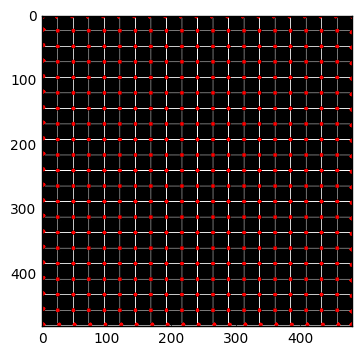

In [9]:
plt.imshow(cornersImage)

이미지 테스트 출력

In [11]:
startPosition = [10, 10] # y : 10, x : 10
endPosition = [2, 2] # y : 5, x : 5
eachPixelLength = 1 #1cm
detectedCornerWidthNums = 21
detectedCornerHeightNums = 21
crossPixelPosition = []

>(10, 10) 번째 모서리를 시작, (2, 2) 번째 모서리를 끝으로 각 블럭의 크기가 1cm라고 가정

>인식된 가로 모서리들의 갯수는 21개 인식된 세로 모서리들의 갯수는 21개

>교차 좌표를 저장할 배열 초기화

In [12]:
def ConvertPositionToArrayAddress(position, heightScale):
    return position[0] * heightScale + position[1]

원하는 (n, n)번째 모서리의 픽셀 좌표가 저장된 1차원 배열의 번지를 찾아가기위한 변환작업

In [13]:
def GetPixelPositionFromArrayAddress(cornerData, address):
    return cornerData[address].ravel()

[] 빼기

In [14]:
startPositionPixelX, startPositionPixelY = GetPixelPositionFromArrayAddress(cornersPositionDataFiltered, 
                                                  ConvertPositionToArrayAddress(startPosition, detectedCornerHeightNums))
cv2.circle(cornersImage, (startPositionPixelX, startPositionPixelY), 3, (0, 255, 0), -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ..., 
       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,

시작 좌표에 원을 그림

In [15]:
crossPixelPosition.append(startPositionPixelX)

시작좌표의 x좌표를 교차 좌표의x로 저장

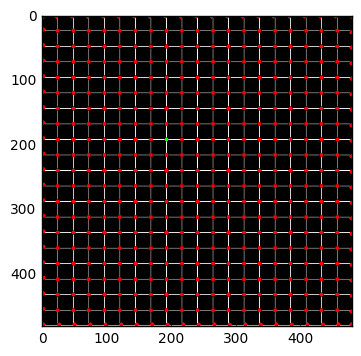

In [16]:
plt.imshow(cornersImage)

이미지 테스트 출력

In [17]:
endPositionPixelX, endPositionPixelY = GetPixelPositionFromArrayAddress(cornersPositionDataFiltered, 
                                                  ConvertPositionToArrayAddress(endPosition, detectedCornerHeightNums))
cv2.circle(cornersImage, (endPositionPixelX, endPositionPixelY), 3, (0, 0, 255), -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ..., 
       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,

끝 좌표에 원을 그림

In [18]:
crossPixelPosition.append(endPositionPixelY)

끝 좌표의 y좌표를 교차 좌표y로 저장

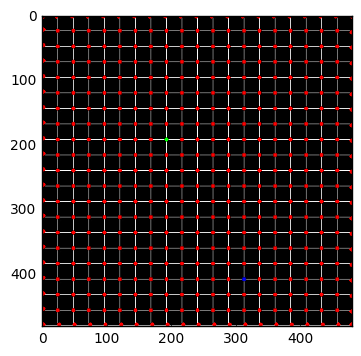

In [19]:
plt.imshow(cornersImage)

이미지 테스트 출력

In [21]:
cv2.circle(cornersImage, (crossPixelPosition[0], crossPixelPosition[1]), 3, (255, 0, 255), -1)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ..., 
       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,

교차 좌표에 해당하는 곳에 원을 그림

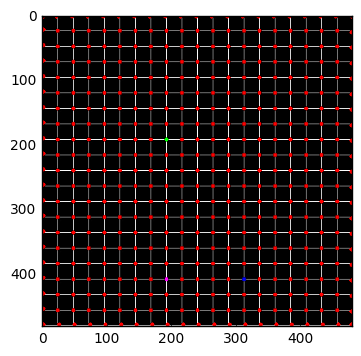

In [22]:
plt.imshow(cornersImage)

이미지 테스트 출력

In [23]:
print startPositionPixelX, startPositionPixelY, endPositionPixelX, endPositionPixelY, crossPixelPosition

192 192 312 408 [192, 408]


저장된 좌표들 테스트 출력

In [24]:
xCoordinateBlockNums = 0
for indexOfCornerData in cornersPositionDataFiltered:
    pixelX, pixelY = indexOfCornerData.ravel()
    if crossPixelPosition[0] <= pixelX and pixelX <= endPositionPixelX and pixelY == crossPixelPosition[1]:
        print pixelX, pixelY
        xCoordinateBlockNums += 1
print xCoordinateBlockNums

312 408
288 408
264 408
240 408
216 408
192 408
6


교차 좌표를 기준으로 x축에 몇개의 블럭이 존재하는지 체크

In [26]:
yCoordinateBlockNums = 0
for indexOfCornerData in cornersPositionDataFiltered:
    pixelX, pixelY = indexOfCornerData.ravel()
    if startPositionPixelY <= pixelY and pixelY <= crossPixelPosition[1] and pixelX == crossPixelPosition[0]:
        print pixelX, pixelY
        yCoordinateBlockNums += 1
print yCoordinateBlockNums

192 408
192 384
192 360
192 336
192 312
192 288
192 264
192 240
192 216
192 192
10


교차 좌표를 기준으로 y축에 몇개의 블럭이 존재하는지 체크

In [32]:
resultDistance = math.sqrt(xCoordinateBlockNums * xCoordinateBlockNums + yCoordinateBlockNums * yCoordinateBlockNums) * eachPixelLength
print resultDistance, "cm"

11.6619037897 cm


피타고라스 정리를 이용해 길이 측정

In [35]:
cv2.line(cornersImage, (startPositionPixelX, startPositionPixelY), (endPositionPixelX, endPositionPixelY), (255, 255, 255))

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ..., 
       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ..., 
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,

해당 길이를 구한 내용을 이미지에 선을 그림

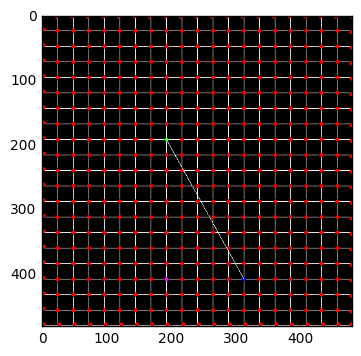

In [36]:
plt.imshow(cornersImage)

이미지 테스트 출력